In [1]:
import os, sys, shutil
import torch
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib as plt
from PIL import Image
sys.path.append("../src")
from utils import *
from autoencoder import AutoEncoder
from matplotlib.lines import Line2D
import matplotlib as mpl
import math
import matplotlib.image as mpimg
import random
os.chdir("..")

/export/raid1/home/kneel027/miniconda3/envs/SS/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
all_betas_ae = [[], [], [], []]
all_betas = []
all_sessions = []
for s, subject in enumerate([1,2,5,7]):
    _, _, x_test, _, _, targets_clips, sessions = load_nsd(vector="c", subject=subject, loader=False, average=False, nest=True, return_sessions=True)
    all_betas.append(x_test)
    all_sessions.append(sessions)
    # AEModel = AutoEncoder(config="gnet",
    #                                 inference=True,
    #                                 subject=subject,
    #                                 device="cuda:1")
    # for i in tqdm(range(x_test.shape[0])):
    #     ae_beta = AEModel.predict(x_test[i]).detach().cpu()
    #     all_betas_ae[s].append(ae_beta)

                                                                        
loading samples: 100%|██████████| 27749/27749 [00:03<00:00, 8271.59it/s]


Data Shapes... x_train: torch.Size([21216, 15724]), x_val: torch.Size([3763, 15724]), x_test: torch.Size([2770, 15724]), y_train: torch.Size([21216, 1024]), y_val: torch.Size([3763, 1024]), y_test: torch.Size([2770, 1024])


                                                                        
loading samples: 100%|██████████| 27749/27749 [00:03<00:00, 8622.89it/s]


Data Shapes... x_train: torch.Size([21260, 14278]), x_val: torch.Size([3719, 14278]), x_test: torch.Size([2770, 14278]), y_train: torch.Size([21260, 1024]), y_val: torch.Size([3719, 1024]), y_test: torch.Size([2770, 1024])


                                                                        
loading samples: 100%|██████████| 27749/27749 [00:03<00:00, 8588.35it/s]


Data Shapes... x_train: torch.Size([21231, 13039]), x_val: torch.Size([3748, 13039]), x_test: torch.Size([2770, 13039]), y_train: torch.Size([21231, 1024]), y_val: torch.Size([3748, 1024]), y_test: torch.Size([2770, 1024])


                                                                        
loading samples: 100%|██████████| 27749/27749 [00:03<00:00, 8918.78it/s]

Data Shapes... x_train: torch.Size([21240, 12682]), x_val: torch.Size([3739, 12682]), x_test: torch.Size([2770, 12682]), y_train: torch.Size([21240, 1024]), y_val: torch.Size([3739, 1024]), y_test: torch.Size([2770, 1024])


In [10]:
all_betas_var = np.zeros((4,982))
all_betas_var_ae = np.zeros((4,982))
all_betas_num_sessions = np.zeros((4,982))
for subject in range(len(all_betas)):
    for sample in tqdm(range(982)):
        # all_betas_var_ae[subject, sample] = bootstrap_variance(all_betas_ae[subject][sample], 100)
        all_betas_var[subject, sample] = bootstrap_variance(all_betas[subject][sample], 100)
        all_betas_num_sessions[subject, sample] = len(np.unique(all_sessions[subject][sample]))
        # print(all_sessions[subject][sample])

100%|██████████| 982/982 [00:09<00:00, 99.87it/s] 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


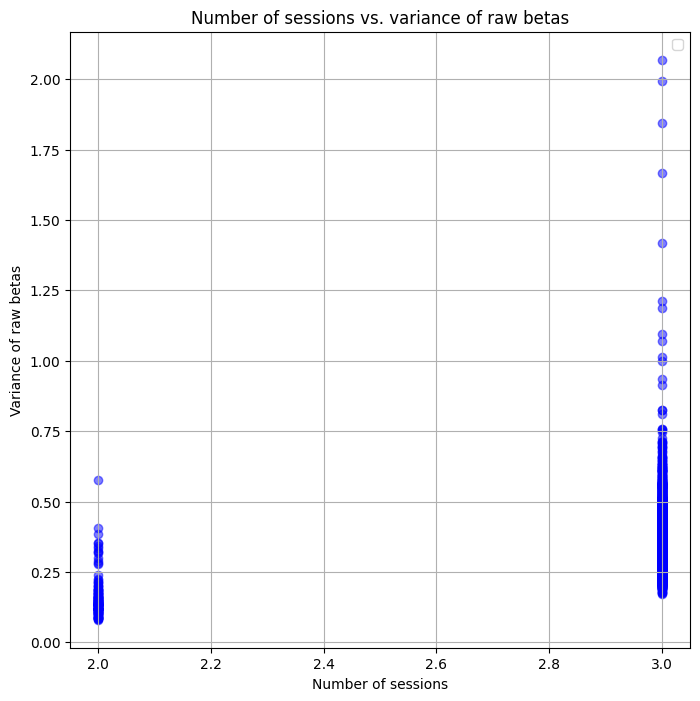

In [13]:
plt.figure(figsize=(8, 8))

# Overlay each scatter plot in one figure
plt.scatter(all_betas_num_sessions.flatten(), all_betas_var.flatten(), c="blue", alpha=0.5)

# Adding labels and title
plt.ylabel('Variance of raw betas')
plt.xlabel('Number of sessions')
plt.title('Number of sessions vs. variance of raw betas')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


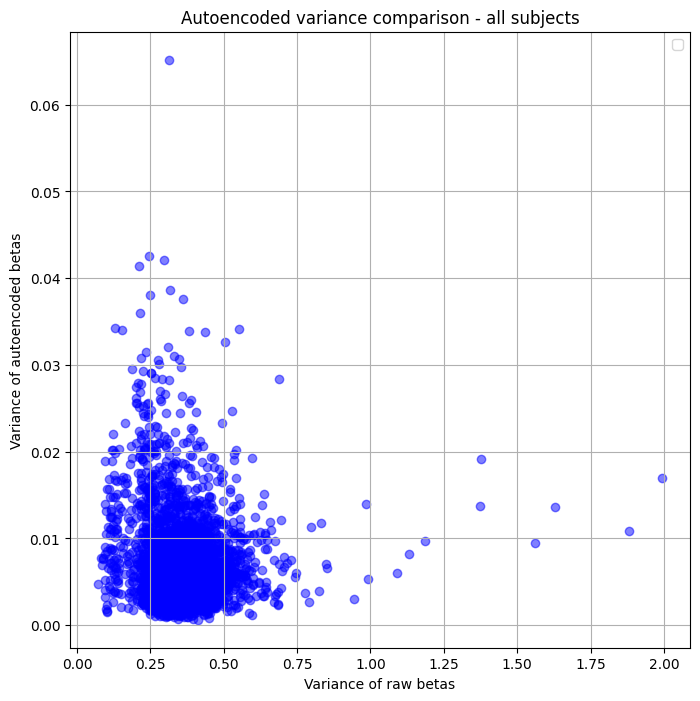

In [5]:
plt.figure(figsize=(8, 8))

# Overlay each scatter plot in one figure
plt.scatter(all_betas_var.flatten(), all_betas_var_ae.flatten(), c="blue", alpha=0.5)

# Adding labels and title
plt.xlabel('Variance of raw betas')
plt.ylabel('Variance of autoencoded betas')
plt.title('Autoencoded variance comparison - all subjects')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

combinations = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
overall_min = np.min(all_betas_var)
overall_max = 1.0

# Create the plots again with standardized axes
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2x3 subplot for the 6 combinations of 4 subjects
for ax, (i, j) in zip(axs.flatten(), combinations):
    ax.scatter(all_betas_var[i], all_betas_var[j])
    ax.set_xlim(overall_min, overall_max)
    ax.set_ylim(overall_min, overall_max)
    ax.set_xlabel(f'Subject {i+1} Variance')
    ax.set_ylabel(f'Subject {j+1} Variance')
    ax.set_title(f'Subject {i+1} vs Subject {j+1}')
    ax.grid(True)

plt.tight_layout()
plt.show()

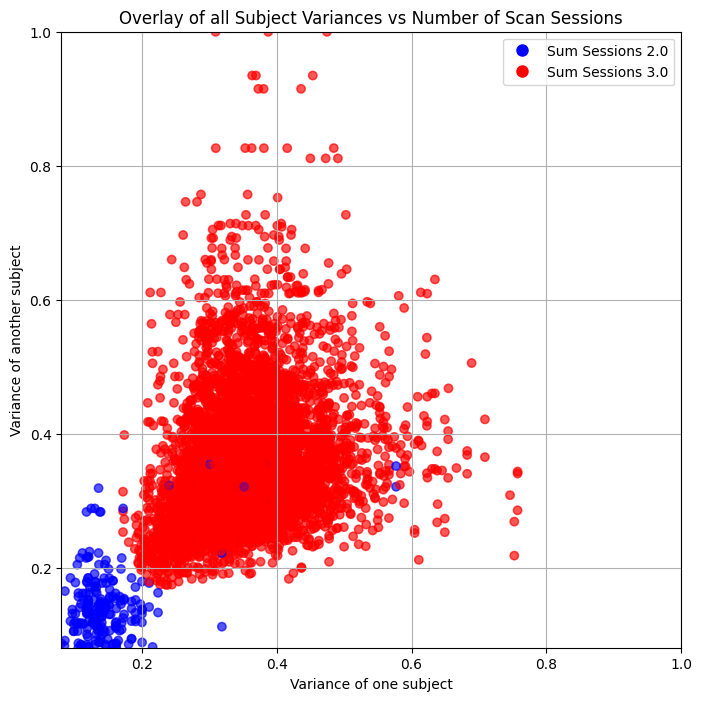

In [33]:
combinations = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
overall_min = np.min(all_betas_var)
overall_max = 1
colors = {4: 'blue', 6: 'red'}
# Stacking all plots on top of each other means overlaying them in a single plot.
# We will create one plot where each combination of subjects is represented with a different color.

# Colors for the different plots for visual distinction

plt.figure(figsize=(8, 8))

# Overlay each scatter plot in one figure
for (i, j) in combinations:
    for session_value in [1, 2, 3]:
        # Filter the data points for the current session value
        color_idx = all_betas_num_sessions[i] + all_betas_num_sessions[j]
        plt.scatter(all_betas_var[i], all_betas_var[j], c=[colors[k] for k in color_idx], alpha=0.3)

# Standardize the axes based on the overall data range
plt.xlim(overall_min, overall_max)
plt.ylim(overall_min, overall_max)

# Adding labels and title
plt.xlabel('Variance of one subject')
plt.ylabel('Variance of another subject')
plt.title('Overlay of all Subject Variances vs Number of Scan Sessions')
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, label=f'Sum Sessions {sum_sessions/2}', markersize=10) for sum_sessions, color in colors.items()]
plt.legend(handles=legend_elements)
plt.grid(True)
plt.show()


torch.Size([12, 16, 15724]) torch.Size([12, 1024])
torch.Size([12, 16, 14278]) torch.Size([12, 1024])
torch.Size([12, 16, 15226]) torch.Size([12, 1024])
torch.Size([12, 16, 13153]) torch.Size([12, 1024])
torch.Size([12, 16, 13039]) torch.Size([12, 1024])
torch.Size([12, 16, 17907]) torch.Size([12, 1024])
torch.Size([12, 16, 12682]) torch.Size([12, 1024])
torch.Size([12, 16, 14386]) torch.Size([12, 1024])


100%|██████████| 12/12 [00:00<00:00, 42.41it/s]


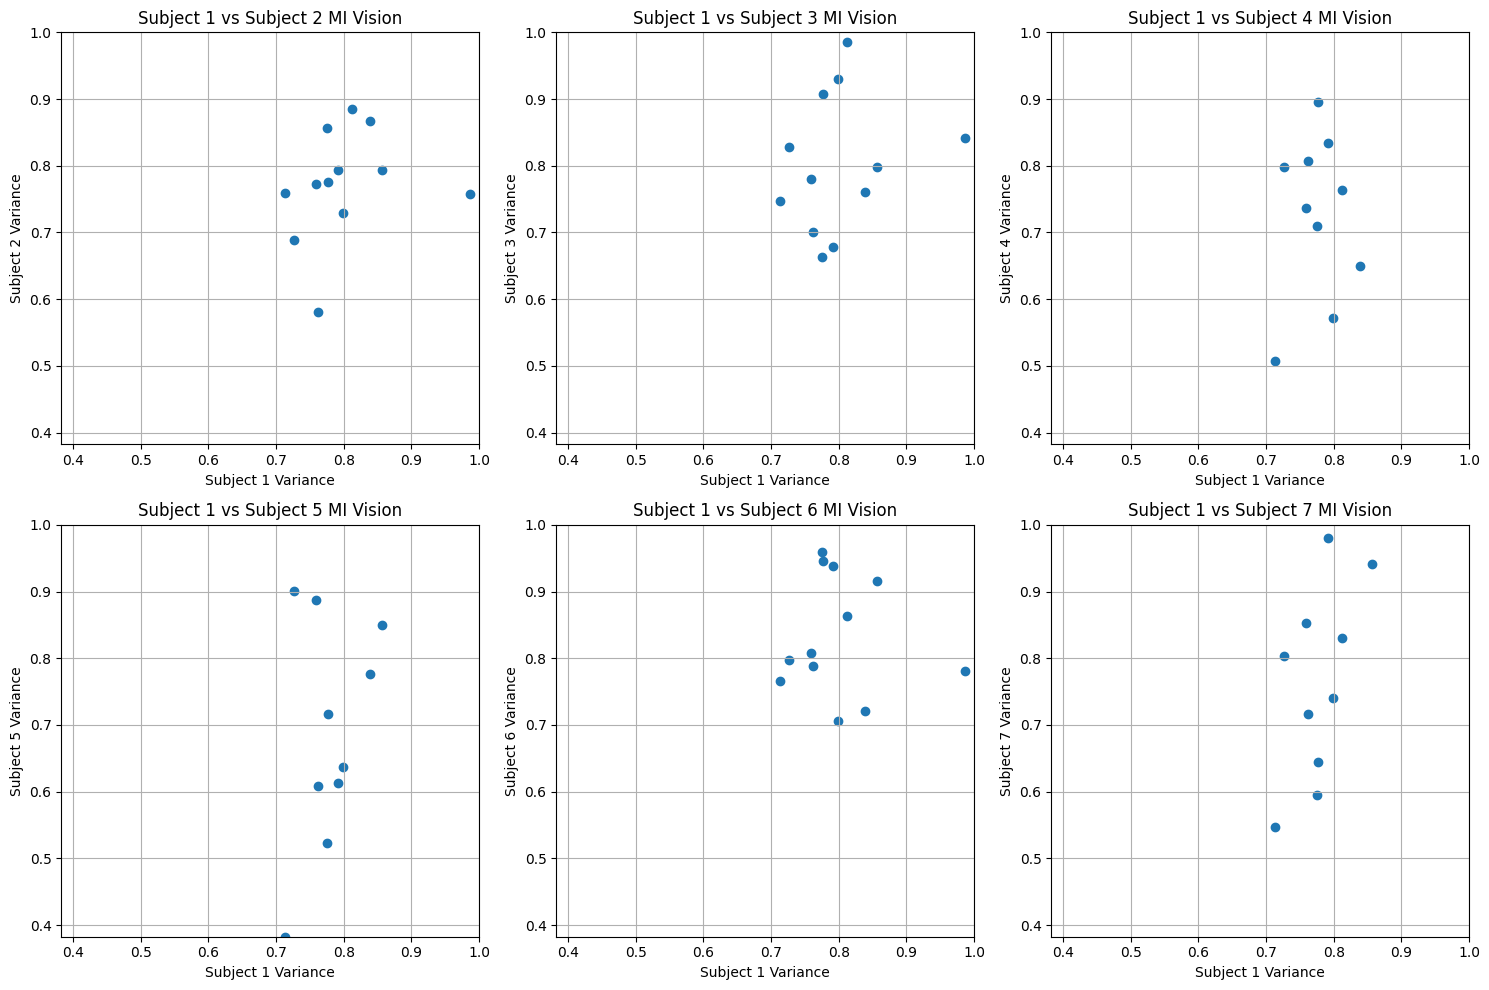

In [13]:
all_betas = []
for subject in [1,2,3,4,5,6,7,8]:
    mi_betas, _ = load_nsd_mental_imagery(vector="c", subject=subject, mode="imagery", stimtype="all", average=False, nest=True)
    all_betas.append(mi_betas)
    
all_betas_var = np.zeros((8,12))
    
for subject in range(len(all_betas)):
    for sample in tqdm(range(12)):
        all_betas_var[subject, sample] = np.var(all_betas[subject][sample].numpy()).mean()
        all_betas_var[subject, sample] = bootstrap_variance(all_betas[subject][sample], 100)
        

combinations = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7),
 (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7),
 (2, 3), (2, 4), (2, 5), (2, 6), (2, 7),
 (3, 4), (3, 5), (3, 6), (3, 7),
 (4, 5), (4, 6), (4, 7),
 (5, 6), (5, 7),
 (6, 7)]
overall_min = np.min(all_betas_var)
overall_max = 1.0

# Create the plots again with standardized axes
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # 2x3 subplot for the 6 combinations of 4 subjects
for ax, (i, j) in zip(axs.flatten(), combinations):
    ax.scatter(all_betas_var[i], all_betas_var[j])
    ax.set_xlim(overall_min, overall_max)
    ax.set_ylim(overall_min, overall_max)
    ax.set_xlabel(f'Subject {i+1} Variance')
    ax.set_ylabel(f'Subject {j+1} Variance')
    ax.set_title(f'Subject {i+1} vs Subject {j+1} MI Vision')
    ax.grid(True)

plt.tight_layout()
plt.show()
        

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


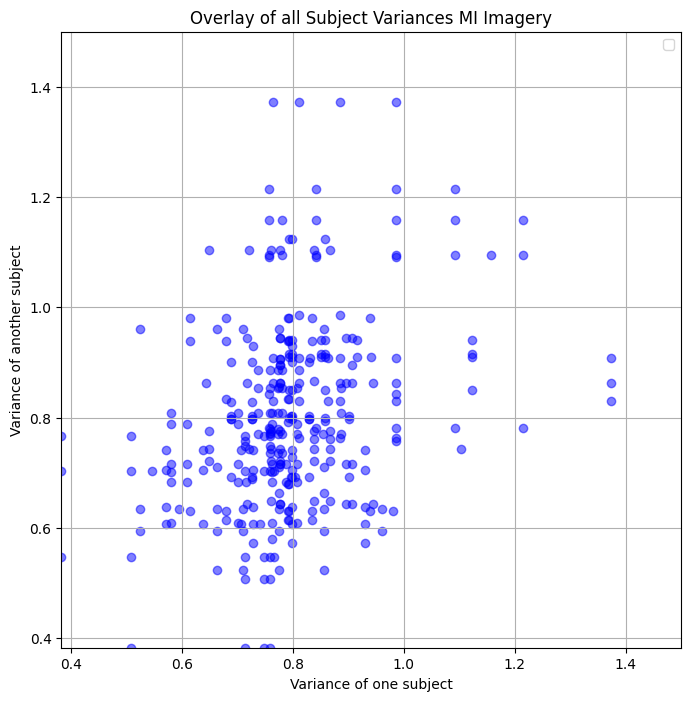

In [15]:
combinations = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7),
 (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7),
 (2, 3), (2, 4), (2, 5), (2, 6), (2, 7),
 (3, 4), (3, 5), (3, 6), (3, 7),
 (4, 5), (4, 6), (4, 7),
 (5, 6), (5, 7),
 (6, 7)]
overall_min = np.min(all_betas_var)
overall_max = 1.5

# Stacking all plots on top of each other means overlaying them in a single plot.
# We will create one plot where each combination of subjects is represented with a different color.

# Colors for the different plots for visual distinction

plt.figure(figsize=(8, 8))

# Overlay each scatter plot in one figure
for (i, j) in combinations:
    plt.scatter(all_betas_var[i], all_betas_var[j], c="blue", alpha=0.5)

# Standardize the axes based on the overall data range
plt.xlim(overall_min, overall_max)
plt.ylim(overall_min, overall_max)

# Adding labels and title
plt.xlabel('Variance of one subject')
plt.ylabel('Variance of another subject')
plt.title('Overlay of all Subject Variances MI Imagery')
plt.legend()
plt.grid(True)
plt.show()